In [11]:
import os
import matplotlib.pyplot as plt
from common.utils import load_data
%matplotlib inline
import pandas as pd
from datetime import datetime

In [12]:
# sample datasets:
cyclist_trip_path = "./data/202106-divvy-tripdata.csv"
flight_data_path = "./data/flights.csv"
container_data_path = "./data/container-ports-2000-2017.csv"


In [13]:
cyclist_df = pd.read_csv(cyclist_trip_path, delimiter=",")
cyclist_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,99FEC93BA843FB20,electric_bike,2021-06-13 14:31:28,2021-06-13 14:34:11,NaN,NaN,NaN,NaN,41.80,-87.59,41.80,-87.60,member
1,06048DCFC8520CAF,electric_bike,2021-06-04 11:18:02,2021-06-04 11:24:19,NaN,NaN,NaN,NaN,41.79,-87.59,41.80,-87.60,member
2,9598066F68045DF2,electric_bike,2021-06-04 09:49:35,2021-06-04 09:55:34,NaN,NaN,NaN,NaN,41.80,-87.60,41.79,-87.59,member
3,B03C0FE48C412214,electric_bike,2021-06-03 19:56:05,2021-06-03 20:21:55,NaN,NaN,NaN,NaN,41.78,-87.58,41.80,-87.60,member
4,B9EEA89F8FEE73B7,electric_bike,2021-06-04 14:05:51,2021-06-04 14:09:59,NaN,NaN,NaN,NaN,41.80,-87.59,41.79,-87.59,member


In [14]:
# add date column containing only the day of the rides for each ride
cyclist_df['started_at'] = pd.to_datetime(cyclist_df['started_at'], format='%Y-%m-%d %H:%M:%S')
cyclist_df['day'] = cyclist_df['started_at'].dt.strftime('%m-%d')

In [15]:
cyclist_df['day']

tmp = cyclist_df.groupby('day').size()


<AxesSubplot:xlabel='day'>

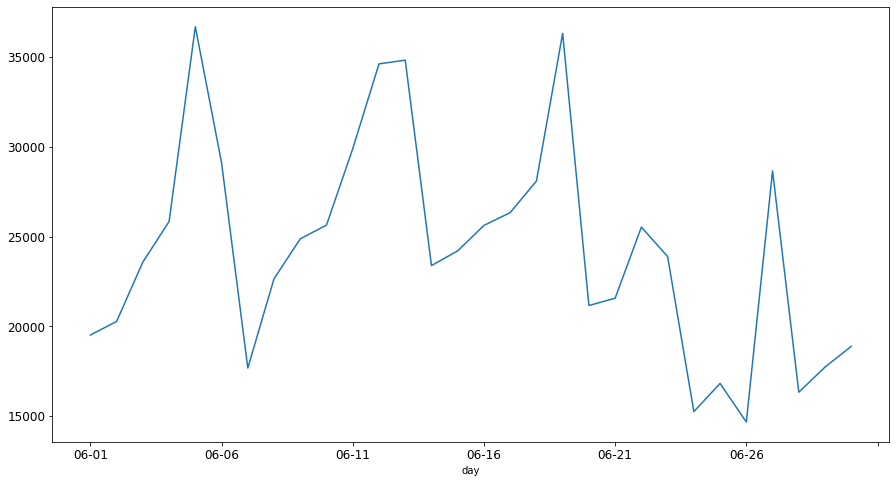

In [20]:
tmp.plot(figsize=(15,8), fontsize=12)

In [21]:
# visualize flight data:
flight_df = pd.read_csv(flight_data_path, delimiter=',')

flight_df.head()

,Origin,Destination,Origin City,Origin State,Destination City,Destination State,Passengers,Seats,Flights,Distance,Fly Date,Origin Population,Destination Population
0,EUG,RDM,Eugene,OR,Bend,OR,41,396,22,103.0,199011,284093,76034
1,EUG,RDM,Eugene,OR,Bend,OR,88,342,19,103.0,199012,284093,76034
2,EUG,RDM,Eugene,OR,Bend,OR,11,72,4,103.0,199010,284093,76034
3,MFR,RDM,Medford,OR,Bend,OR,0,18,1,156.0,199002,147300,76034
4,MFR,RDM,Medford,OR,Bend,OR,11,18,1,156.0,199003,147300,76034


In [42]:
flight_numbers_date = flight_df.groupby('Fly Date').size()
f_df = flight_numbers_date.to_frame(name='Age')
f_df
print(type(f_df.index[0]))


SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (Temp/ipykernel_17968/2537722052.py, line 5)

In [57]:
f_df.index.values

tmp_df = f_df.rename(index=lambda x: str(x)[0:4]+ "-" +str(x)[4:])
tmp_df['Time'] = tmp_df.index.values

<AxesSubplot:xlabel='Fly Date'>

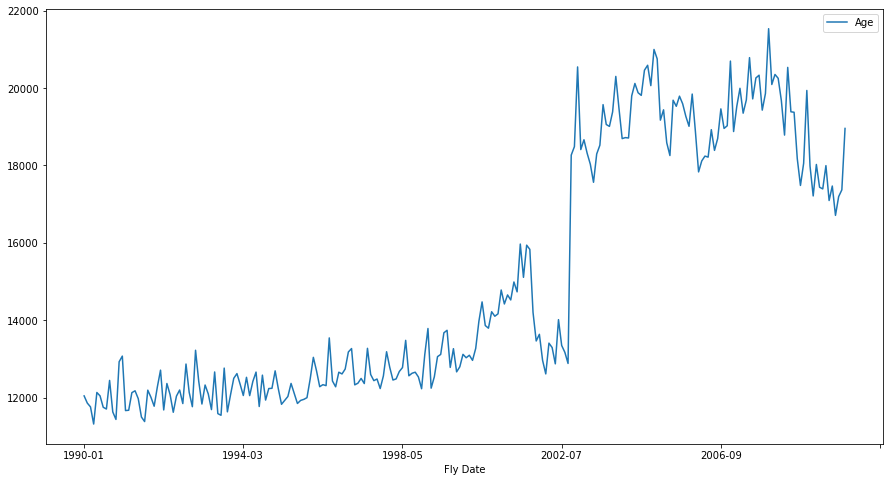

In [59]:
tmp_df.plot(figsize=(15,8))

In [60]:
container_df = pd.read_csv(container_data_path, delimiter=",")

In [61]:
container_df

,U.S. Custom Ports,Coast,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,"Aberdeen, WA",P,0,0,0,0,0,8,0,0,0,29,0,16,414,645,855,43,505,383
1,"Anacortes, WA",P,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0
2,"Anchorage, AK",AK,0,0,0,"3,135","28,495","4,949","1,185",824,663,"1,208",540,"2,302","5,471","13,274","6,792","11,646","15,823","18,779"
3,"Baltimore, MD",A,"1,899,689","1,942,158","2,189,129","2,077,996","2,641,888","2,640,988","2,824,549","2,756,330","2,855,096","2,380,630","2,929,029","3,108,746","3,243,542","3,438,606","3,691,480","3,977,777","4,264,068","4,871,362"
4,"Baton Rouge, LA",G,8,0,959,21,3,149,"1,562",0,0,"1,164","6,456","2,587",12,"1,987",72,0,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,"Tampa, FL",G,"16,628","7,456","1,266","19,025","51,578","54,146","102,160","165,708","159,427","158,427","173,733","178,133","163,086","153,983","187,207","221,477","288,062","437,302"
59,"Vancouver, WA",P,"3,854","6,584",744,744,"32,310","2,022","1,400","1,918",28,810,"6,295","2,717","1,637","6,612","9,797","13,939","8,697","7,416"
60,"West Palm Beach, FL",A,"175,863","195,119","279,381","270,677","295,326","263,359","214,975","223,600","228,120","187,388","214,805","196,670","216,288","297,694","364,623","357,895","348,418","367,329"
61,"Wilmington, DE",A,"904,575","964,634","1,030,240","1,518,071","1,114,766","1,127,645","1,222,941","1,309,694","1,274,591","1,185,657","1,204,818","1,282,243","1,339,599","1,496,540","1,599,242","1,621,830","1,729,359","1,738,055"


In [75]:
container_df['2000'] = container_df['2000'].apply(lambda x: int(str(x).replace(",", "")))

In [76]:
container_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   U.S. Custom Ports  63 non-null     object
 1   Coast              62 non-null     object
 2   2000               63 non-null     int64 
 3   2001               63 non-null     object
 4   2002               63 non-null     object
 5   2003               63 non-null     object
 6   2004               63 non-null     object
 7   2005               63 non-null     object
 8   2006               63 non-null     object
 9   2007               63 non-null     object
 10  2008               63 non-null     object
 11  2009               63 non-null     object
 12  2010               63 non-null     object
 13  2011               63 non-null     object
 14  2012               63 non-null     object
 15  2013               63 non-null     object
 16  2014               63 non-null     object
 17 